# Exploratory Data Analysis

In [30]:

import os
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np

In [31]:
def fileCounter(directory: str):
    lst = os.listdir(directory)
    fileCount = len(lst)
    
    return fileCount

In [32]:
trainingPizzaPath = 'pizza-notpizza/train/pizza'
trainingNotPizzaPath = 'pizza-notpizza/train/not_pizza'

validationPizzaPath = 'pizza-notpizza/val/pizza'
validationNotPizzaPath = 'pizza-notpizza/val/not_pizza'

testingPizzaPath = 'pizza-notpizza/test/pizza'
testingNotPizzaPath = 'pizza-notpizza/test/not_pizza'

In [33]:
trainPizzaCount = fileCounter(trainingPizzaPath)
trainNotPizzaCount = fileCounter(trainingNotPizzaPath)

training = [trainPizzaCount, trainNotPizzaCount]
training

[786, 786]

In [34]:
valPizzaCount = fileCounter(validationPizzaPath)
valNotPizzaCount = fileCounter(validationNotPizzaPath)

validation = [valPizzaCount, valNotPizzaCount]
validation

[98, 98]

In [35]:
testPizzaCount = fileCounter(testingPizzaPath)
testNotPizzaCount = fileCounter(testingNotPizzaPath)

testing = [testPizzaCount, testNotPizzaCount]
testing

[99, 99]

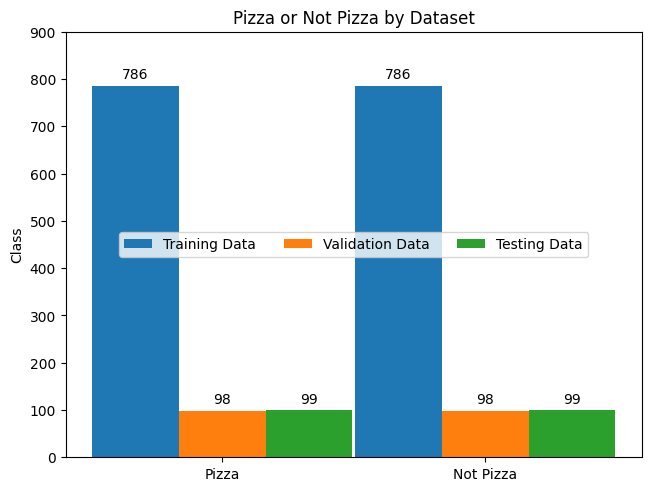

In [36]:
classes = ['Pizza', 'Not Pizza']
classesCount = {
    'Training Data': training,
    'Validation Data': validation,
    'Testing Data': testing
}

x = np.arange(len(classes))
width = 0.33
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for dataset, eachClassCount in classesCount.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, eachClassCount, width, label = dataset)
    ax.bar_label(rects, padding=3)
    multiplier += 1
    
ax.set_ylabel('Quantity')
ax.set_ylabel('Class')
ax.set_title('Pizza or Not Pizza by Dataset')
ax.set_xticks(x + width, classes)
ax.legend(loc = 'center', ncols = 3)
ax.set_ylim(0, 900)

plt.show()

# First attepmt to train
- Lasso Regularization
- CNN Network
- 3 x 256 x 256 input size

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim

import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torchvision.transforms.functional as F
from torchvision.transforms import v2

import torchmetrics as metrics

from sklearn.metrics import confusion_matrix, classification_report

In [53]:
trainData = 'pizza-notpizza/train'
valData = 'pizza-notpizza/val'
testData = 'pizza-notpizza/test'

In [54]:
trainTransforms = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

valTestTransforms = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor()
])

trainDataset = datasets.ImageFolder(trainData, transform=trainTransforms)
valDataset = datasets.ImageFolder(valData, transform=valTestTransforms)
testDataset = datasets.ImageFolder(testData, transform=valTestTransforms)

In [55]:
class_to_idx = trainDataset.class_to_idx

for label, value in class_to_idx.items():
    print(f'Class Name: {label}, Numeric Value: {value}')

Class Name: not_pizza, Numeric Value: 0
Class Name: pizza, Numeric Value: 1


In [56]:
trainDataset[3]

(tensor([[[-0.9922, -0.9843, -0.9843,  ..., -0.9843, -0.9843, -0.9843],
          [-0.9843, -0.9843, -0.9843,  ..., -0.9922, -0.9922, -0.9922],
          [-0.9373, -0.9373, -0.9294,  ..., -0.9843, -0.9843, -0.9922],
          ...,
          [-0.7176, -0.7020, -0.7098,  ..., -0.9843, -0.9843, -0.9843],
          [-0.9608, -0.9686, -0.9608,  ..., -0.9922, -0.9922, -0.9922],
          [-0.9922, -0.9922, -0.9843,  ..., -0.9922, -0.9922, -0.9922]],
 
         [[-0.9922, -0.9843, -0.9843,  ..., -1.0000, -1.0000, -1.0000],
          [-0.9843, -0.9843, -0.9843,  ..., -0.9922, -0.9922, -0.9922],
          [-0.9765, -0.9686, -0.9686,  ..., -1.0000, -1.0000, -1.0000],
          ...,
          [-0.8275, -0.8196, -0.8196,  ..., -0.9922, -0.9922, -0.9922],
          [-0.9922, -1.0000, -0.9922,  ..., -0.9922, -0.9922, -0.9922],
          [-0.9843, -0.9922, -0.9765,  ..., -0.9922, -0.9922, -0.9922]],
 
         [[-0.9765, -0.9765, -0.9765,  ..., -0.9922, -0.9922, -0.9922],
          [-0.9922, -0.9922,

In [57]:
BATCH_SIZE = 16
NUM_WORKERS = 4
LEARNING_RATE = 0.0025
WEIGHT_DECAY = 1e-5

In [58]:
trainLoader = torch.utils.data.DataLoader(trainDataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=NUM_WORKERS)
valLoader = torch.utils.data.DataLoader(valDataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=NUM_WORKERS)
testLoader = torch.utils.data.DataLoader(testDataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=NUM_WORKERS)

In [61]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        
        self.fc1 = nn.Linear(128 * 32 * 32, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 2)
        
        self.dropout = nn.Dropout(0.6)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        
    def forward(self, x):
        x = self.pool(nn.functional.leaky_relu(self.conv1(x)))
        x = self.pool(nn.functional.leaky_relu(self.conv2(x)))
        x = self.pool(nn.functional.leaky_relu(self.conv3(x)))
        
        x = x.view(x.size(0), -1)
        
        x = nn.functional.leaky_relu(self.fc1(x))
        x = self.dropout(x)
        x = nn.functional.leaky_relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        
        return x

In [62]:
model = CNN()

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE, weight_decay=WEIGHT_DECAY)

trainLossHistory = []
trainAccHistory = []

for epoch in range(50):
    model.train()
    correct = 0
    total = 0
    running_loss = 0.0
    
    for i, data in enumerate(trainLoader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()
        
        if i % 1000 == 999:
            print(f'[{epoch + 1}, {i + 1} Loss: {running_loss / 1000}]')
            running_loss = 0.0
            
    epoch_loss = running_loss / len(trainLoader)
    epoch_acc = 100 * correct / total
    trainLossHistory.append(epoch_loss)
    trainAccHistory.append(epoch_acc)
    
    print(f'=== EPOCH [{epoch + 1}]===\n    Loss: {epoch_loss} Accuracy: {epoch_acc}')
    
print('FINISHED TRAINING!')

=== EPOCH [1]===
    Loss: 0.7591472490869388 Accuracy: 55.470737913486005
=== EPOCH [2]===
    Loss: 0.6500231936724499 Accuracy: 65.26717557251908
=== EPOCH [3]===
    Loss: 0.616161340866426 Accuracy: 68.70229007633588
=== EPOCH [4]===
    Loss: 0.6444718946110118 Accuracy: 66.0941475826972
=== EPOCH [5]===
    Loss: 0.6270775325370558 Accuracy: 68.06615776081425
=== EPOCH [6]===
    Loss: 0.575353612502416 Accuracy: 71.2468193384224
=== EPOCH [7]===
    Loss: 0.5497876547201715 Accuracy: 74.36386768447836
=== EPOCH [8]===
    Loss: 0.5388901462458601 Accuracy: 74.30025445292621
=== EPOCH [9]===
    Loss: 0.5844134131465295 Accuracy: 71.81933842239185
=== EPOCH [10]===
    Loss: 0.5432953760780469 Accuracy: 74.23664122137404
=== EPOCH [11]===
    Loss: 0.5213058353072465 Accuracy: 75.89058524173028
=== EPOCH [12]===
    Loss: 0.5146653181073642 Accuracy: 75.89058524173028
=== EPOCH [13]===
    Loss: 0.4452986219766164 Accuracy: 80.08905852417303
=== EPOCH [14]===
    Loss: 0.4223894

NameError: name 'train_loss_history' is not defined

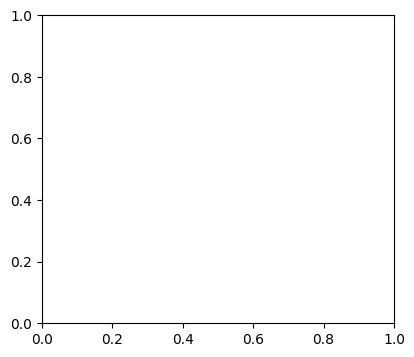

In [63]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(range(1, len(train_loss_history) + 1), train_loss_history, color='green', label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.suptitle('Training Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_accuracy_history) + 1), train_accuracy_history, color='pink', label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy [%]')
plt.suptitle('Training Accuracy')
plt.legend()

plt.tight_layout()
plt.show()